# Coffee Roasting

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import logging

import tensorflow as tf
from tensorflow.keras.layers import Normalization
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras import Sequential
from tensorflow.keras.losses import MeanSquaredError, BinaryCrossentropy
from tensorflow.keras.activations import sigmoid

print(f'Tensorflow version : {tf.__version__}')
print(f'Using GPU: {"no" if len(tf.config.list_physical_devices("GPU")) == 0 else "yes"}.')

# prevent tensorflow from using all the GPU memory
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  try:
    tf.config.experimental.set_memory_growth(gpus[0], True)
  except RuntimeError as e:
    print(e)
logging.getLogger('tensorflow').setLevel(logging.ERROR)
tf.autograph.set_verbosity(0)

2025-11-17 23:56:46.454410: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-11-17 23:56:46.464670: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1763423806.476958    5538 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1763423806.480661    5538 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2025-11-17 23:56:46.493850: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instr

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

AttributeError: 'MessageFactory' object has no attribute 'GetPrototype'

Tensorflow version : 2.18.0
Using GPU: yes.


In [3]:
from lab_coffee_utils import load_coffee_data, plt_roast

X, Y = load_coffee_data()
features = ['temperature', 'duration']
print(X[0])
X.shape, Y.shape

[185.32  12.69]


((200, 2), (200, 1))

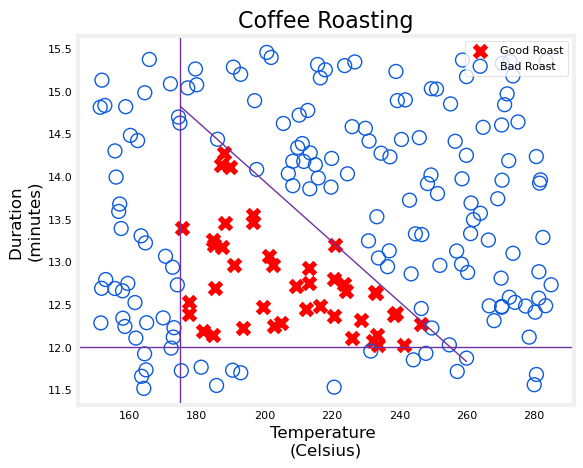

In [4]:
plt_roast(X, Y)

## Normalization

In [5]:
peak_to_peak = np.ptp(X, axis=0)

print(f'Peak to peak temperature: {peak_to_peak[0]:.2f}')
print(f'Peak to peak duration: {peak_to_peak[1]:.2f}')
print(f'Max temperature: {np.max(X[:, 0])}')
print(f'Max duration: {np.max(X[:, 1])}')

Peak to peak temperature: 133.67
Peak to peak duration: 3.94
Max temperature: 284.99434167453603
Max duration: 15.454206928801511


In [6]:
normalizer = Normalization(axis=-1)
normalizer.adapt(X)

Xn = normalizer(X);

I0000 00:00:1763423808.517870    5538 gpu_device.cc:2022] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 14257 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3080 Laptop GPU, pci bus id: 0000:01:00.0, compute capability: 8.6


In [7]:
peak_to_peak = np.ptp(Xn, axis=0)

print(f'Peak to peak temperature: {peak_to_peak[0]:.2f}')
print(f'Peak to peak duration: {peak_to_peak[1]:.2f}')
print(f'Max temperature: {np.max(Xn[:, 0])}')
print(f'Max duration: {np.max(Xn[:, 1])}')

Peak to peak temperature: 3.34
Peak to peak duration: 3.49
Max temperature: 1.6597541570663452
Max duration: 1.793238878250122


In [8]:
# Fake more examples

Xt = np.tile(Xn, (1000, 1))
Yt = np.tile(Y, (1000, 1))

Xt.shape, Yt.shape

((200000, 2), (200000, 1))

In [9]:
model = Sequential([
    Input(shape=(2,), name='input'),    # 2D
    Dense(3, activation='sigmoid', name='l1'),
    Dense(1, activation='sigmoid', name = 'l2')    # not best practice
])

In [10]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ l1 (Dense)                      │ (None, 3)              │             9 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ l2 (Dense)                      │ (None, 1)              │             4 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13 (52.00 B)

 Trainable params: 13 (52.00 B)

 Non-trainable params: 0 (0.00 B)

In [11]:
l1 = model.get_layer('l1')
# w_l1 is (2, 3)
w_l1, b_l1 = l1.get_weights()

w_l1, b_l1

(array([[-0.09,  0.97,  0.64],
        [ 0.46,  0.71,  0.42]], dtype=float32),
 array([0., 0., 0.], dtype=float32))

## Train the Model

In [12]:
tf.debugging.set_log_device_placement(True) # make sure data is in the GPU VRAM

model.compile(
    loss = BinaryCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.01),
)

print('Starting model training...')
model.fit(
  Xt,
  Yt,
  epochs=10,
  verbose=1
)
print('Finished model training.')

# Disable device placement logging afterwards
tf.debugging.set_log_device_placement(False)

Starting model training...
Epoch 1/10


I0000 00:00:1763423809.746866    5767 service.cc:148] XLA service 0x7f94d801a1d0 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1763423809.746883    5767 service.cc:156]   StreamExecutor device (0): NVIDIA GeForce RTX 3080 Laptop GPU, Compute Capability 8.6
2025-11-17 23:56:49.756444: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1763423809.811004    5767 cuda_dnn.cc:529] Loaded cuDNN version 90501


 173/6250 ━━━━━━━━━━━━━━━━━━━━ 5s 882us/step - loss: 0.4897   

I0000 00:00:1763423810.190703    5767 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


6250/6250 ━━━━━━━━━━━━━━━━━━━━ 6s 755us/step - loss: 0.2459
Epoch 2/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 5s 742us/step - loss: 0.1208
Epoch 3/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 5s 757us/step - loss: 0.0475
Epoch 4/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 5s 786us/step - loss: 0.0186
Epoch 5/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 5s 785us/step - loss: 0.0123
Epoch 6/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 5s 804us/step - loss: 0.0088
Epoch 7/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 5s 778us/step - loss: 0.0063
Epoch 8/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 5s 784us/step - loss: 0.0046
Epoch 9/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 5s 798us/step - loss: 0.0035
Epoch 10/10
6250/6250 ━━━━━━━━━━━━━━━━━━━━ 5s 804us/step - loss: 0.0026
Finished model training.


In [15]:
W1, b1 = model.get_layer("l1").get_weights()
W2, b2 = model.get_layer("l2").get_weights()
print("W1:\n", W1, "\nb1:", b1)
print("W2:\n", W2, "\nb2:", b2)

W1:
 [[ 1.29e+01  7.11e-03  1.43e+01]
 [ 2.89e-01 -8.95e+00  1.19e+01]] 
b1: [ 13.47 -11.19   1.69]
W2:
 [[ 39.06]
 [-46.12]
 [-44.1 ]] 
b2: [-12.55]


In [17]:
X_test = np.array([
  [200, 13.9],  # positive
  [200, 19]   # negative
])

y_test = np.array([1, 0])

X_test_n = normalizer(X_test)

In [18]:
y_preds = model.predict(X_test_n)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 101ms/step


In [21]:
for p in y_preds:
  if p >= 0.5:
    print(1)
  else:
    print(0)

1
0


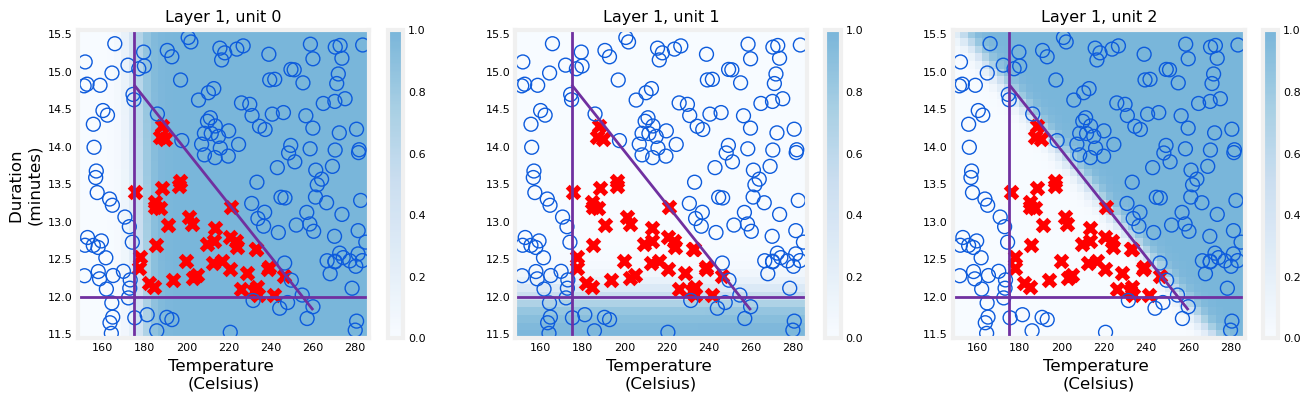

In [24]:
from lab_coffee_utils import plt_layer
plt_layer(X, Y.reshape(-1,), W1, b1, normalizer)

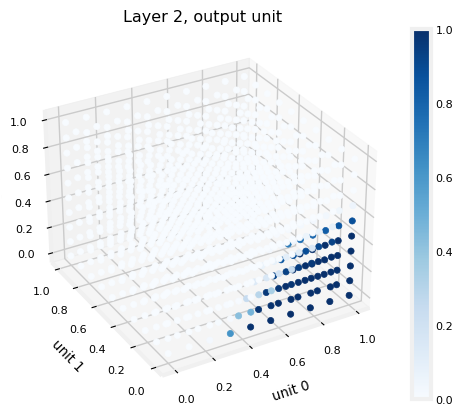

In [25]:
from lab_coffee_utils import plt_output_unit

plt_output_unit(W2, b2)

In [39]:
def manual_dense(a_in, W, b, g=lambda x: x): # g defaults to linear
  """
  Dense layer implementation.
  Args:
    a_in: ndarray(n,)    incoming a
    W: ndarray(n, j)     weights matrix, features per unit in the layer, j units in the layer
    b: ndarray(n,)       bias vector
    g: f                 activation function
  Returns:
    a_out: ndarray(j,)   j units
  """
  
  units = W.shape[1]
  a_out = []
  for j in range(units):
    z = np.dot(W[:, j], a_in) + b[j]
    a_out.append(g(z))
  
  return a_out


In [42]:
from mlutils import sigmoid

def predict(X, W1, b1, W2, b2):
  m = X.shape[0]   # number of features in the X matrix
  preds = np.zeros((m, 1))

  for i in range(m):
    a1 = manual_dense(Xn[i], W1, b1, sigmoid)
    a2 = manual_dense(a1, W2, b2, sigmoid)
    preds[i] = a2
  
  return preds

In [45]:
for p in predict(X_test_n, W1, b1, W2, b2):
  if p >= 0.5:
    print(1)
  else:
    print(0)

1
0
